<a href="https://colab.research.google.com/github/borundev/DNN_Lectures/blob/master/Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MontyHall:
    
    def __init__(self,nc,ng):
        self.nc=nc # number of cars
        self.ng=ng # number of goats
        self.n=nc+ng # total number of doors
        
        # randomize the cars and goats
        self.c = np.array([1]*nc+[0]*ng)
        np.random.shuffle(self.c)
        
        # indices of goats
        self.zero_index=np.where(self.c==0)[0]
        
        # indices of cars
        self.one_index=np.where(self.c==1)[0]
        
        # all indices
        self.all_index = np.arange(0,self.n)
        
        self.choose()
        self.open_door()
        
    def choose(self):
        # the player chooses a door
        self.d = np.random.randint(0,self.n)
        
        # remove the chosen door from the indices
        self.zero_index=self.zero_index[np.where(self.zero_index!=self.d)[0]]
        self.one_index=self.one_index[np.where(self.one_index!=self.d)[0]]
        self.all_index=self.all_index[np.where(self.all_index!=self.d)[0]]
        
    def open_door(self):
        # The host chooses a door with goat
        
        d=np.random.choice(self.zero_index)
        
        # remove the chosen door from the indices 
        self.zero_index=self.zero_index[np.where(self.zero_index!=d)[0]]
        self.all_index=self.all_index[np.where(self.all_index!=d)[0]]

    def choose2(self,k):
        assert k in (0,1), "invalid action"
        if k==0: # don't switch
            return self.c[self.d]
        else: # switch
            new_d = np.random.choice(self.all_index)
            return self.c[new_d]

In [67]:
class Bandit:
    
    def __init__(self,max_steps,nc=1,ng=2,epsilon=.1,gamma=1.0):
    
        self.qs=[0,0]
        self.steps=[0,0]
        self.total_steps=0
        self.max_steps=max_steps
        
        self.r=0
        
        self.rs=[]

        self.nc=nc
        self.ng=ng
        
        self.epsilon=epsilon
        self.gamma=gamma
        
        
    def step_once(self):
        if np.random.random() < self.epsilon or self.qs[0] == self.qs[1]:
            a=np.random.randint(0,2)
        else:
            a=np.argmax(self.qs)
                
        self.epsilon *= self.gamma
        
        r=MontyHall(self.nc,self.ng).choose2(a)
        self.steps[a]+=1
        self.total_steps+=1
            
        self.qs[a] +=  1.0/self.steps[a]*(r-self.qs[a])
        self.r += 1.0/self.total_steps*(r-self.r)
        self.rs.append(self.r)
    
    def run(self):
        for _ in range(self.max_steps):
            self.step_once()

    


Text(0, 0.5, 'Average Reward')

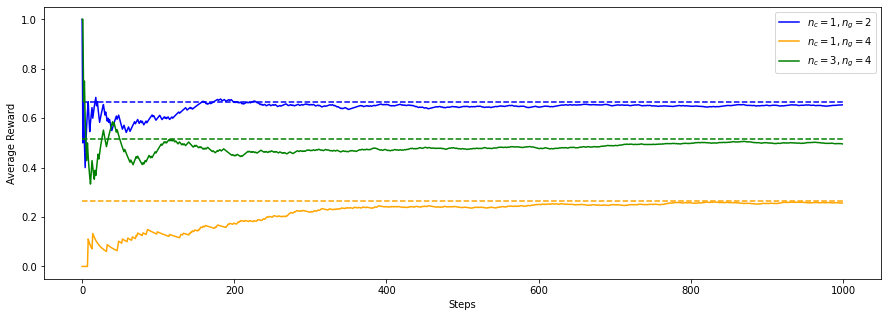

In [79]:
plt.subplots(1,1,figsize=(15,5))
for nc,ng,c in ((1,2,'blue'),(1,4,'orange'),(3,4,'green')):
    b=Bandit(1000,nc=nc,ng=ng,epsilon=.1)
    b.run()
    plt.plot(b.rs,color=c,label='$n_c={nc},n_g={ng}$'.format(nc=nc,ng=ng))
    n=nc+ng
    p=nc/n*(n-1)/(n-2)
    plt.plot([0,1000],[p,p],'--',color=c)
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Average Reward')